<a href="https://colab.research.google.com/github/NSworks/Knowledge-Engineering/blob/main/s19048_12c_PRO4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Błąd dla #1:  [0.02275172]
Błąd dla #2:  [0.01673827]
Czy model #2 jest dokładniejszy?  [ True]


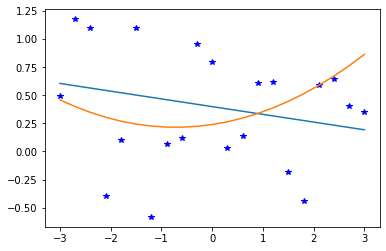

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import e as euler

a = np.loadtxt('dane15.txt')

x = a[:, [0]]
y = a[:, [1]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Model #1 - Funkcja liniowa y = ax + b
c2 = np.hstack([X_train, np.ones(X_train.shape)]) 
v2 = np.linalg.pinv(c2) @ y_train

#Wektor błędu
e1 = sum((y - (v2[0] * x + v2[1]))) ** 2 / len(x)  
print("Błąd dla #1: ",e1)

plt.plot(x, y, 'b*')
#plt.scatter(X_test, y_test,  color='red')
plt.plot(x, v2[0] * x + v2[1])


# Model #2 - Funkcja y = x^2 -x + c
c_train = np.hstack([X_train * X_train,X_train,np.ones(X_train.shape)]) 
# wektor parametrów
v_train = np.linalg.pinv(c_train) @ y_train 

c_test = np.hstack([X_test * X_test,X_test,np.ones(X_test.shape)]) 
v_test = np.linalg.pinv(c_test) @ y_test # wektor parametrów

model_train = v_train[0] * x * x - v_train[1] * x + v_train[2] 
model_test =  v_test[0] * x * x -  v_test[1] * x + v_test[2] 
e_train_model = sum((y - model_train)) ** 2 / len(x)  #wektor błędu
# e_train = sum((y_train - ( v_train[0] * X_train * X_train -  v_train[1] * X_train + v_train[2] ))) ** 2 / len(x)  #wektor błędu
# e_test = sum((y_test - ( v_train[0] * X_test * X_test - v_train[1] * X_test + v_train[2] ))) ** 2 / len(x)  #wektor błędu
# e_test_model = sum((y - model_test)) ** 2 / len(x)  #wektor błędu
# print(e_test_model)
# print(e_train)
# print(e_test)

print("Błąd dla #2: ",e_train_model)

print("Czy model #2 jest dokładniejszy? ",e1>e_train_model)

plt.plot(x, model_train)
# ----

plt.show()